# Сравнительный анализ алгоритмов Merge Sort и Merge + Insertion Sort

### Краткое описание данных и их считывание

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [14]:
df1 = pd.read_csv("merge_sort_results.csv")
df2 = pd.read_csv("merge_insertion_sort.csv")

In [17]:
df2.columns = df2.columns.str.strip()

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   size           96 non-null     int64
 1   random         96 non-null     int64
 2   reversed       96 non-null     int64
 3   almost_sorted  96 non-null     int64
dtypes: int64(4)
memory usage: 3.1 KB


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   size              96 non-null     int64
 1   random5           96 non-null     int64
 2   reversed5         96 non-null     int64
 3   almost_sorted5    96 non-null     int64
 4   random10          96 non-null     int64
 5   reversed10        96 non-null     int64
 6   almost_sorted10   96 non-null     int64
 7   random15          96 non-null     int64
 8   reversed15        96 non-null     int64
 9   almost_sorted15   96 non-null     int64
 10  random30          96 non-null     int64
 11  reversed30        96 non-null     int64
 12  almost_sorted30   96 non-null     int64
 13  random100         96 non-null     int64
 14  reversed100       96 non-null     int64
 15  almost_sorted100  96 non-null     int64
dtypes: int64(16)
memory usage: 12.1 KB


**df1** - хранит скорость работы обычного Merge Sort для разных размеров массивов.

**df2** - хранит скорость работы Merge + Insertion Sort для разных размеров массивов и разных значений переключения.


В полученных датасетах 96 замеров, по одному на каждую длину.

### Графики и вывод

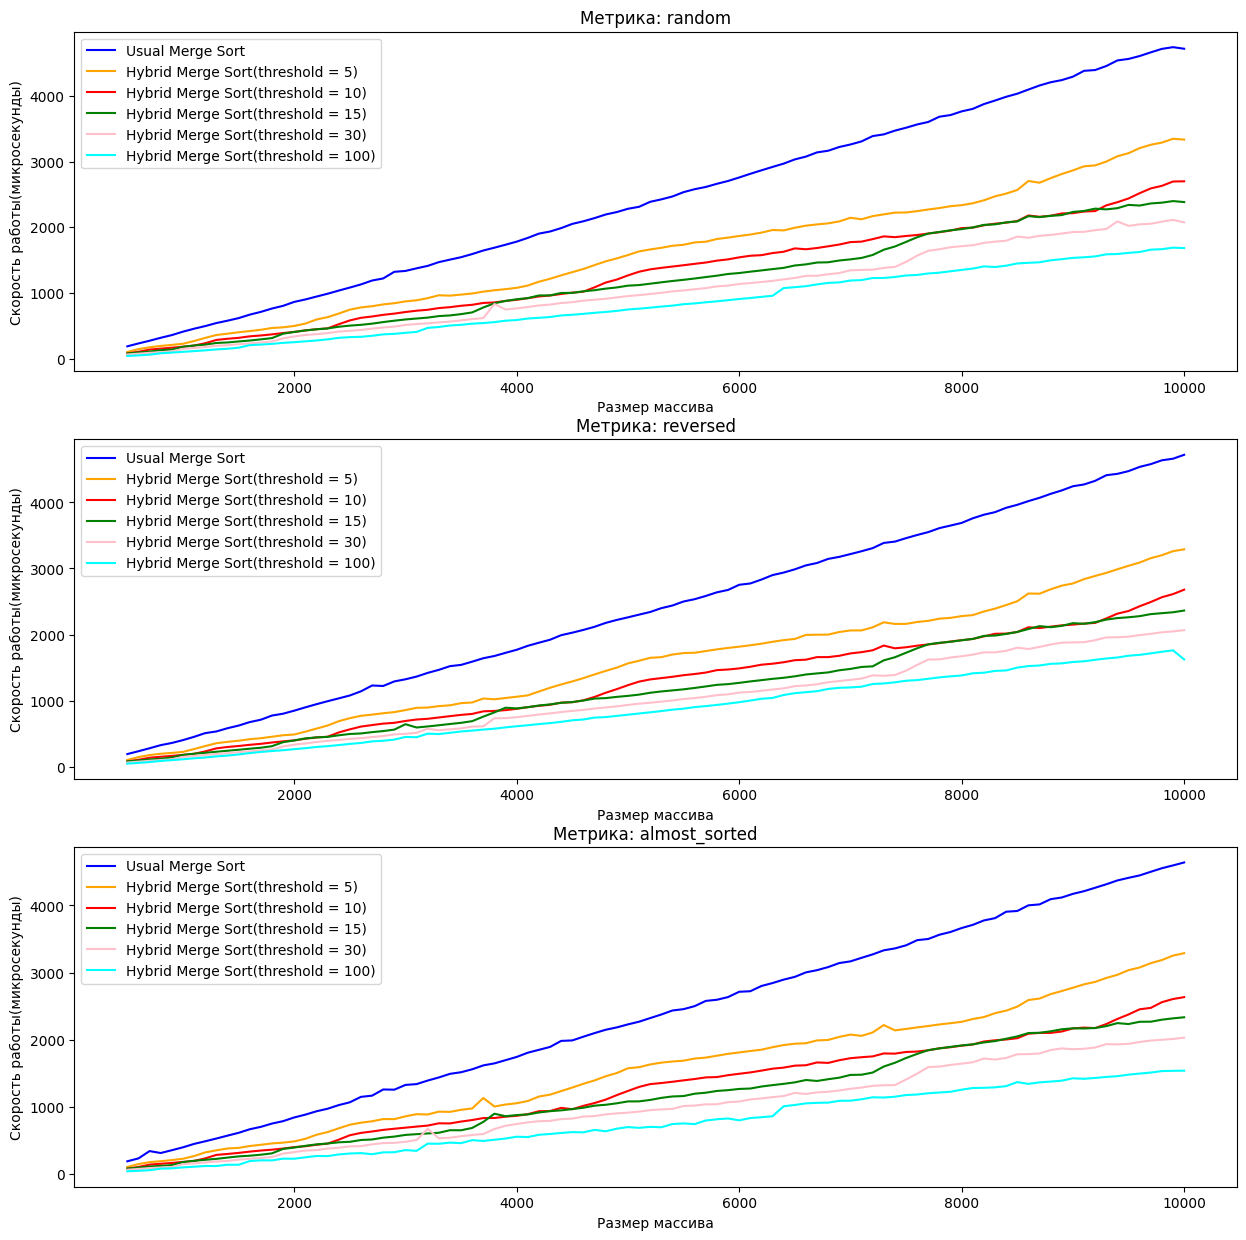

In [23]:
metrics = ['random', 'reversed', 'almost_sorted']
colors = ['blue', 'orange', 'red', 'green', 'pink', 'cyan']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

for i, metric in enumerate(metrics):
    ax = axes[i]

    ax.plot(df1['size'], df1[metric], label='Usual Merge Sort', color=colors[0])
    ax.plot(df2['size'], df2[metric + '5'], label='Hybrid Merge Sort(threshold = 5)', color=colors[1])
    ax.plot(df2['size'], df2[metric + '10'], label='Hybrid Merge Sort(threshold = 10)', color=colors[2])
    ax.plot(df2['size'], df2[metric + '15'], label='Hybrid Merge Sort(threshold = 15)', color=colors[3])
    ax.plot(df2['size'], df2[metric + '30'], label='Hybrid Merge Sort(threshold = 30)', color=colors[4])
    ax.plot(df2['size'], df2[metric + '100'], label='Hybrid Merge Sort(threshold = 100)', color=colors[5])

    ax.set_title(f"Метрика: {metric}")
    ax.set_xlabel('Размер массива')
    ax.set_ylabel('Скорость работы(микросекунды)')
    ax.legend()

plt.show()

Графики для разных видов отсортированных массивов показывают схожую тенденцию. Видно, что на массивах до 10000 модифициованный алгоритм сортировки работает в 2 и более раз(в зависимости от значения переключения) на больших значениях.

Очевидно, что при еще большем увелечении threshold тенденция измениться, однако, даже на достаточно большом переключении в 100 элементов мы получаем огроменное улучшение в скорости относительно классического алгоритма.

Основной выводы, которые можно сделать:
- Использование модифицированного алгоритма выгоднее, чем использование классического. Cама концепция переключения дает большой прирост в скорости.
- threshold влияет на скорость решения, однако, по сравнению с другими решениями, использующими этот подход, выбор значения должен быть усредненым (в моем случае это 15 и 30).